This post we look at some pseudo code for simple linear regression and multiple linear regression <br>
This is continuation of the [simple linear regression post](https://www.kaggle.com/rakend/simple-linear-regression-using-gradient-descent)

Take home from this pseudo code can be observing how the vector size of the feature vector and parameter vector changes for SLR and MLR.  <br>
This can be little confusing and frustating at times 

![](https://drive.google.com/uc?id=1LIaxxO9MuJUvKSruCkzxBHaY_upb0LI5)

![](https://drive.google.com/uc?id=14HYJy_z_hJjZiNIQ_c81Ec3ePcg4cgG2)


![](https://drive.google.com/uc?id=1hGL590sluMBRr_5tntG8Qo_PV7VxaNo3)

![](https://drive.google.com/uc?id=1rFbWrjPfT1CMoCw9hR9C6QWtwAvPPHAt)

![](https://drive.google.com/uc?id=1Y6XiDWfzdCsUkVytA_7wcFrw40FAON05)

![](https://drive.google.com/uc?id=15CR0HEwHlVqZHFg66uY0dHkt5tKgqJ9k)

![](https://drive.google.com/uc?id=1u6kHk2ujLmFZG89Wo8h-n27OSp2JR_CG)

![](https://drive.google.com/uc?id=1OAI7GmHHTCwOGpxVUaZQyi7xnw_nNM4U)

![](https://drive.google.com/uc?id=1ENyf4CtlHwFshz8szsEvsO6qFvbsgNv8)

### Working

Like, in the earlier post, here too we'll try solving MLR from the scratch and also from sci-kit learn package. <br>
Now we'll jump in to see how 

In [ ]:
### import libraries #####



import dataset

##########################################
data = pd.read_csv('50_Startups.csv')
data.head()
##########################################

In [156]:
#### import dataset  #####



In [ ]:
#### separate dependent and independent variable #####


#### show x and y


#### reshaping the dependent variable (50,) -> (50,1)
y = y.reshape((y.shape[0],1))

# Taking care of String variable in Dataset


In [ ]:
look in the dataset and find row of the string variable

###################
x[:,3]
##################

In [157]:
#### print string variable



In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
aa = encoder.fit_transform(x[:,3])
aa

# we need to remove string variable from dataset

In [127]:
x = x[:,:-1]

# concatenate the categorical variable and dataset

In [158]:
x = np.concatenate((x,aa),axis=1)

### print x

#  Remove Dummy variable trap 

In [159]:
x = x[:,:-1]

## Standard scaler 
$ z=x-mean(x)/SD(x) $


In [130]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#### reshaping since we need (m,) dimensions to feed in the model
y_train = y_train.reshape((y_train.shape[0],))


#### print the shape of the x_train, y_train, x_test and y_test

# adding one layer in x_train and x_test for theta_0 * 1

In [167]:
one = np.ones((40,1))
x_train = np.concatenate((one,x_train),axis=1)


In [168]:
one = np.ones((10,1))
x_test = np.concatenate((one,x_test),axis=1)

In [169]:
### print shape of the x_train and x_test



### Trying from the scratch

In [134]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(6)
print(theta.shape)#initializing theta with some random values

(6,)


In [135]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [136]:
prediction_list, cost_list, theta_list = gradient_descent(x_train, y_train, 40, theta, alpha)
theta = theta_list[-1]

In [137]:
theta

array([-0.02030651,  0.8703408 ,  0.02705753,  0.1204007 , -0.01042683,
       -0.02313893])

In [138]:
cost_list[-1]

0.025641664494810132

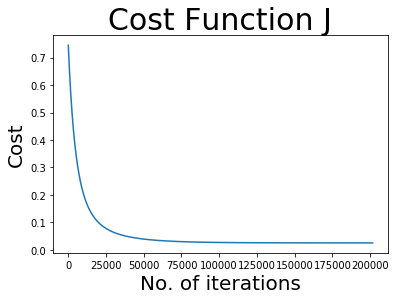

In [139]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

Using equation of hyperplane

In [144]:
yp = theta[0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + theta[5]*x_test[:,5]
yp

array([-0.22602964,  0.50690313,  0.50095408, -1.00635916,  1.65647133,
        0.11988024, -1.10115589, -0.32954444,  0.05186803,  1.38833188])

In [150]:
y_train_pred = theta[0] + theta[1]*x_train[:,1] + theta[2]*x_train[:,2] + theta[3]*x_train[:,3] + theta[4]*x_train[:,4] + theta[5]*x_train[:,5]
y_train_pred

array([-0.40992179, -0.56852628, -0.0700905 , -0.50652513,  0.37517594,
        1.17289983,  0.91832169, -1.59504028, -1.67634755, -0.22480771,
        0.83625615, -0.39596941, -0.37284095,  0.11651215, -1.06538768,
        0.10940688, -1.28061595,  1.02656634,  0.38620074, -0.24733058,
        1.2469173 ,  0.498345  , -0.92098084, -1.60016975,  1.94420534,
        0.38366599, -0.66915261, -0.02490429,  1.08972171, -0.0870742 ,
       -0.91382967,  0.21231842,  0.0677685 ,  1.0123825 , -0.76570116,
       -1.3531393 ,  1.52486983,  2.03252447, -1.6271045 , -1.15524375])

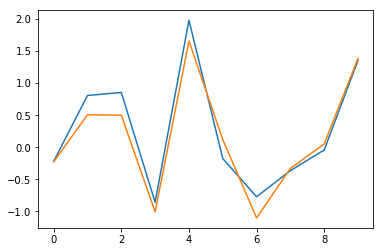

In [153]:
plt.plot(y_test)
plt.plot(yp)

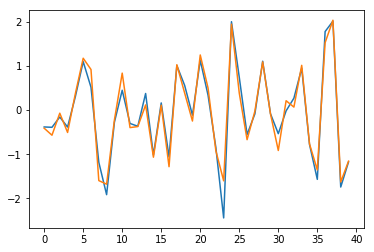

In [154]:
plt.plot(y_train)
plt.plot(y_train_pred)

In [155]:
#root mean squared error
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
print(rmsle(y_test, yp))

0.23457580324598792
